In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# cf.) function

In [2]:
def check_NA(df):
    print(f"NA check")
    NA_res = df.isna().sum()
    if NA_res.sum() != 0:
        for idx, i in enumerate(NA_res):
            if i != 0:
                print(df.columns[idx],i,"->",round(i/df.shape[0]*100,3),"%")
    else:
        print("...There's no NA")

def dual_countplot(col, figsize=(14,8), pallete="Set2", flip=True):
    plt.rcParams["figure.figsize"] = figsize
    fig, ax = plt.subplots(ncols=2)
    if flip:
        sns.countplot(y=train[col],palette=pallete,order=train[col].unique(),ax=ax[0]).set_title("train")
        sns.countplot(y=test[col],palette=pallete,order=train[col].unique(),ax=ax[1]).set_title("test")
    else:
        sns.countplot(x=train[col],palette=pallete,order=train[col].unique(),ax=ax[0]).set_title("train")
        sns.countplot(x=test[col],palette=pallete,order=train[col].unique(),ax=ax[1]).set_title("test")
    plt.tight_layout()
    plt.show()

**Problem** <br>
▶**단지코드별 등록차량수를 predict하는 regression 문제**

**Evaluation** <br>
▶**MAE**

# Data info
## train & test
0. 단지코드
1. 총세대수
2. 임대건물구분
3. 지역
4. 공급유형
5. 전용면적
6. 전용면적별세대수
7. 공가수
8. 자격유형
9. 임대보증금
10. 임대료
11. 도보 10분거리 내 지하철역 수(환승노선 수 반영)
12. 도보 10분거리 내 버스정류장 수
13. 단지내주차면수
14. 등록차량수

## duplicates 제거 & column명 변경

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
age_gender = pd.read_csv('age_gender_info.csv')

In [4]:
print(train.columns)
print(test.columns)
print(age_gender.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')
Index(['지역', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)',
       '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)',
       '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)',
       '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')


In [5]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수']
test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수']

print(train.columns)
print(test.columns)
print(age_gender.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수'],
      dtype='object')
Index(['지역', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)',
       '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)',
       '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)',
       '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')


In [6]:
train = train.drop_duplicates(keep="first")
test = test.drop_duplicates(keep="first")

## datatype 변경
1) categorical
- 단지코드
- 임대건물구분
- 지역
- 공급유형
- 자격유형

2) numerical
- 총세대수
- 전용면적
- 전용면적별세대수
- 공가수
- **임대보증금: "-" -> NA 처리 후 numeric으로 변경**
- **임대료: "-" -> NA 처리 후 numeric으로 변경**
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수

In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2632 non-null   object 
 1   총세대수      2632 non-null   int64  
 2   임대건물구분    2632 non-null   object 
 3   지역        2632 non-null   object 
 4   공급유형      2632 non-null   object 
 5   전용면적      2632 non-null   float64
 6   전용면적별세대수  2632 non-null   int64  
 7   공가수       2632 non-null   float64
 8   자격유형      2632 non-null   object 
 9   임대보증금     2340 non-null   object 
 10  임대료       2340 non-null   object 
 11  지하철역      2477 non-null   float64
 12  버스정류장     2628 non-null   float64
 13  단지내주차면수   2632 non-null   float64
 14  등록차량수     2632 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 329.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------

In [8]:
train.select_dtypes(exclude='number')

,단지코드,임대건물구분,지역,공급유형,자격유형,임대보증금,임대료
0,C2483,아파트,경상북도,국민임대,A,15667000,103680
1,C2483,아파트,경상북도,국민임대,A,15667000,103680
2,C2483,아파트,경상북도,국민임대,A,27304000,184330
3,C2483,아파트,경상북도,국민임대,A,27304000,184330
4,C2483,아파트,경상북도,국민임대,A,27304000,184330
...,...,...,...,...,...,...,...
2947,C2532,아파트,강원도,국민임대,A,11346000,116090
2948,C2532,아파트,강원도,국민임대,A,14005000,142310
2949,C2532,아파트,강원도,국민임대,A,14005000,142310
2950,C2532,아파트,강원도,국민임대,A,14005000,142310


In [9]:
train.임대료.value_counts()

-         21
390000    19
79980     16
100920    16
590000    14
          ..
16650      1
117060     1
101080     1
273260     1
152280     1
Name: 임대료, Length: 995, dtype: int64

In [10]:
for col in ['임대료','임대보증금']:
    train[col] = train[col].replace('-',np.nan)
    train[col].fillna(-1,inplace=True)
    train[col] = train[col].astype('float')
    train[col] = train[col].replace(-1,np.nan)

for col in ['임대료','임대보증금']:
    test[col] = test[col].replace('-',np.nan)
    test[col].fillna(-1,inplace=True)
    test[col] = test[col].astype('float')
    test[col] = test[col].replace(-1,np.nan)

In [11]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2632 non-null   object 
 1   총세대수      2632 non-null   int64  
 2   임대건물구분    2632 non-null   object 
 3   지역        2632 non-null   object 
 4   공급유형      2632 non-null   object 
 5   전용면적      2632 non-null   float64
 6   전용면적별세대수  2632 non-null   int64  
 7   공가수       2632 non-null   float64
 8   자격유형      2632 non-null   object 
 9   임대보증금     2328 non-null   float64
 10  임대료       2319 non-null   float64
 11  지하철역      2477 non-null   float64
 12  버스정류장     2628 non-null   float64
 13  단지내주차면수   2632 non-null   float64
 14  등록차량수     2632 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 329.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------

In [12]:
num_col = train.select_dtypes(include='number').columns.tolist()
obj_col = train.select_dtypes(exclude='number').columns.tolist()
print(f"numerical features: {num_col}")
print(f"categorical feature: {obj_col}")

numerical features: ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수']
categorical feature: ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']


## NA 확인
- 임대보증금&임대료
- 지하철역&버스정류장
- 자격유형

In [13]:
check_NA(train)
check_NA(test)
check_NA(age_gender)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
자격유형 2 -> 0.211 %
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %
NA check
...There's no NA


# 공급유형 카테고리(NEW)

- 국민임대와 공공임대의 차이
- LH공사와 SH공사에서 제공하는 국민임대는 국가 재정과 국민주택기금을 지원받아 국가, 지방자치단체, 한국토지주택공사 또는 지방공사가 건설, 공급하는 주택을 의미한다. 저렴한 임대료를 지불하고 장기(30년) 임대가 가능하다. 장기 거주는 가능하지만 해당 주거지를 매입할 수 없다는 단점이 있다.
- 반면 공공임대는 5년 또는 10년 후 임대기간이 종료되었을 때 입주자에게 우선 분양전환혜택을 준다.

In [14]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1730,619.0000
임대상가,285,112.0000
공공임대(10년),203,34.0000
행복주택,203,121.0000
영구임대,149,44.0000
공공임대(50년),31,13.0000
공공임대(분납),12,6.0000
장기전세,9,nan
공공분양,7,nan
공공임대(5년),3,nan


## test set에는 장기전세, 공공분양, 공공임대가 없다

In [15]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [16]:
set(train.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [17]:
set(test.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

#### NA imputation
**해당 단지코드에 위치한 동일 임대건물구분의 자격유형으로 대체**

In [18]:
test.loc[test.자격유형.isna(),'단지코드']

196    C2411
258    C2253
Name: 단지코드, dtype: object

In [19]:
test.loc[(test.단지코드=='C2411')&(test.자격유형.isna()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isna()), '자격유형'] = 'C'

In [20]:
check_NA(train)
check_NA(test)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


# 자격유형_카테고리 (NEW)

## 공공임대주택 공급대상

- 영구임대: 생계급여 또는 의료급여 수급자 등[소득 1분위] - 1
- 국민임대: 무주택세대구성원[소득 2~4분위] - 3
- 장기전세: 무주택세대구성원[소득 3~4분위] - 2
- 공공임대(5년/10년/분납): 무주택세대구성원[소득 3~5분위] - 3
- 행복주택: 무주택세대구성원/무주택자[소득 2~5분위] - 4
- 이렇게 나누면 13개 항목인데 자격유형의 항목수는 15개

- 국민임대/장기전세

(일반)해당지역 거주 무주택세대구성원 <br>
(특별/우선)3자녀 이상 가구<br>
(특별/우선)국가유공자<br>
(특별/우선)영구임대 입주자<br>
(특별/우선)비닐간이공작물 거주자<br>
(특별/우선)신혼부부(혼인기간 5년이내)<br>
(특별/우선)사업지구 철거민<br>
(특별/우선)기타 공급대상(고령자, 노부모부양자, 장애인, 파독근로자 등)<br>
건수가 가장 많은 A는 해당지역 거주 무주택세대구성원으로 예상됨<br>

## test에는 K, B, O가 없다. 

In [21]:
for i in train['공급유형'].unique():
    print(i,train[train['공급유형']==i]['자격유형'].unique())

국민임대/장기전세 ['A' 'B' 'E' 'G' 'H']
공공임대(50년) ['A']
영구임대 ['C' 'E' 'F' 'I' 'A']
임대상가 ['D']
공공임대(5년/10년/분납/분양) ['A' 'D']
행복주택 ['J' 'K' 'L' 'M' 'N' 'O']


In [22]:
for i in test['공급유형'].unique():
    print(i,test[test['공급유형']==i]['자격유형'].unique())

국민임대/장기전세 ['H' 'A' 'E' 'G']
영구임대 ['C' 'D' 'I']
임대상가 ['D']
공공임대(50년) ['A']
공공임대(5년/10년/분납/분양) ['A']
행복주택 ['J' 'K' 'L' 'M' 'N']


## A는 이미 섞여있음: 다른 것과 섞지 않는 것이 좋을 것 같음

In [23]:
train.loc[train.자격유형.isin(['A']), '공급유형'].value_counts()

국민임대/장기전세             1524
공공임대(5년/10년/분납/분양)     218
공공임대(50년)               31
영구임대                     2
Name: 공급유형, dtype: int64

In [24]:
test.loc[test.자격유형.isin(['A']), '공급유형'].value_counts()

국민임대/장기전세             516
공공임대(5년/10년/분납/분양)     40
공공임대(50년)              13
Name: 공급유형, dtype: int64

Text(0.5, 1.0, 'test_A')

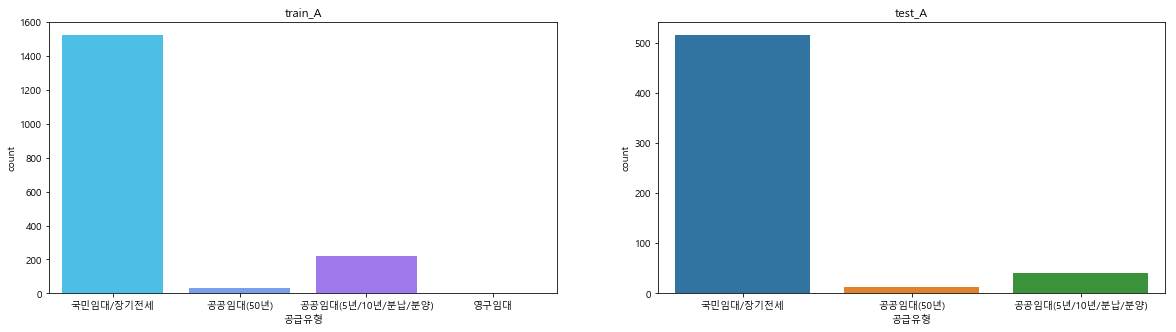

In [25]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(ncols=2)
sns.countplot(x=train.loc[train.자격유형.isin(['A']), '공급유형'],palette="cool",ax=ax[0]).set_title("train_A")
sns.countplot(x=test.loc[test.자격유형.isin(['A']), '공급유형'],ax=ax[1]).set_title("test_A")

## 국민임대/장기전세

In [26]:
print(train.loc[train.자격유형.isin(['B']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['B']), '공급유형'].value_counts())

국민임대/장기전세    18
Name: 공급유형, dtype: int64
Series([], Name: 공급유형, dtype: int64)


In [27]:
train.loc[train.자격유형.isin(['E']), '공급유형'].value_counts()

국민임대/장기전세    34
영구임대          3
Name: 공급유형, dtype: int64

In [28]:
test.loc[test.자격유형.isin(['E']), '공급유형'].value_counts()

국민임대/장기전세    10
Name: 공급유형, dtype: int64

Text(0.5, 1.0, 'test_E')

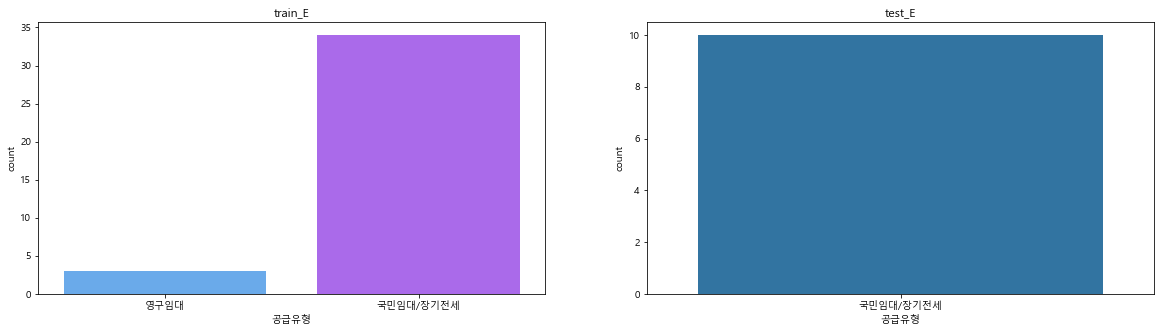

In [29]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(ncols=2)
sns.countplot(x=train.loc[train.자격유형.isin(['E']), '공급유형'],palette="cool",ax=ax[0]).set_title("train_E")
sns.countplot(x=test.loc[test.자격유형.isin(['E']), '공급유형'],ax=ax[1]).set_title("test_E")

In [30]:
print(train.loc[train.자격유형.isin(['G']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['G']), '공급유형'].value_counts())

국민임대/장기전세    9
Name: 공급유형, dtype: int64
국민임대/장기전세    1
Name: 공급유형, dtype: int64


In [31]:
print(train.loc[train.자격유형.isin(['H']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['H']), '공급유형'].value_counts())

국민임대/장기전세    154
Name: 공급유형, dtype: int64
국민임대/장기전세    92
Name: 공급유형, dtype: int64


# 영구임대

In [32]:
print(train.loc[train.자격유형.isin(['C']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['C']), '공급유형'].value_counts())

영구임대    92
Name: 공급유형, dtype: int64
영구임대    35
Name: 공급유형, dtype: int64


In [33]:
print(train.loc[train.자격유형.isin(['F']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['F']), '공급유형'].value_counts())

영구임대    3
Name: 공급유형, dtype: int64
Series([], Name: 공급유형, dtype: int64)


In [34]:
print(train.loc[train.자격유형.isin(['I']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['I']), '공급유형'].value_counts())

영구임대    49
Name: 공급유형, dtype: int64
영구임대    7
Name: 공급유형, dtype: int64


## 임대상가

In [35]:
train.loc[train.자격유형.isin(['D']), '공급유형'].value_counts()

임대상가                  285
공공임대(5년/10년/분납/분양)      7
Name: 공급유형, dtype: int64

In [36]:
test.loc[test.자격유형.isin(['D']), '공급유형'].value_counts()

임대상가    112
영구임대      2
Name: 공급유형, dtype: int64

Text(0.5, 1.0, 'test_D')

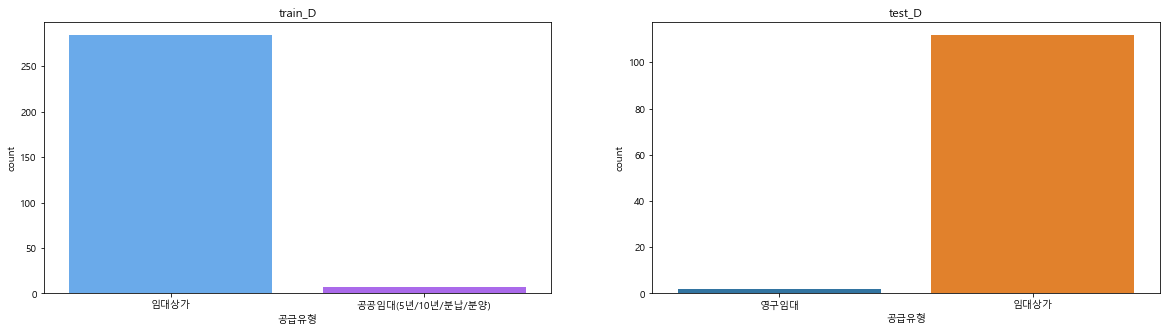

In [37]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(ncols=2)
sns.countplot(x=train.loc[train.자격유형.isin(['D']), '공급유형'],palette="cool",ax=ax[0]).set_title("train_D")
sns.countplot(x=test.loc[test.자격유형.isin(['D']), '공급유형'],ax=ax[1]).set_title("test_D")

## 행복주택

In [38]:
print(train.loc[train.자격유형.isin(['J']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['J']), '공급유형'].value_counts())

행복주택    105
Name: 공급유형, dtype: int64
행복주택    81
Name: 공급유형, dtype: int64


In [39]:
print(train.loc[train.자격유형.isin(['K']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['K']), '공급유형'].value_counts())

행복주택    33
Name: 공급유형, dtype: int64
행복주택    16
Name: 공급유형, dtype: int64


In [40]:
print(train.loc[train.자격유형.isin(['L']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['L']), '공급유형'].value_counts())

행복주택    33
Name: 공급유형, dtype: int64
행복주택    12
Name: 공급유형, dtype: int64


In [41]:
print(train.loc[train.자격유형.isin(['M']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['M']), '공급유형'].value_counts())

행복주택    2
Name: 공급유형, dtype: int64
행복주택    2
Name: 공급유형, dtype: int64


In [42]:
print(train.loc[train.자격유형.isin(['N']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['N']), '공급유형'].value_counts())

행복주택    29
Name: 공급유형, dtype: int64
행복주택    10
Name: 공급유형, dtype: int64


In [43]:
print(train.loc[train.자격유형.isin(['O']), '공급유형'].value_counts())
print(test.loc[test.자격유형.isin(['O']), '공급유형'].value_counts())

행복주택    1
Name: 공급유형, dtype: int64
Series([], Name: 공급유형, dtype: int64)


In [44]:
dic = {'1': 'A' ,'2':['B','E','G','H'],'3':['C','F','I'],'4':'D','5':['J','K','L','M','N','O']}

In [45]:
def category2(x):
    for i in dic.keys():
        if x in dic[i]:
            return int(i)

In [46]:
train['자격유형_카테고리'] = train['자격유형'].apply(lambda x : category2(x))

In [47]:
train.자격유형_카테고리=train.자격유형_카테고리.astype(object)

In [48]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수,자격유형_카테고리
0,C2483,900,아파트,경상북도,국민임대/장기전세,39.7200,134,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1
1,C2483,900,아파트,경상북도,국민임대/장기전세,39.7200,15,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1
2,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,385,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1
3,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,15,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1
4,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,41,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   단지코드       2632 non-null   object 
 1   총세대수       2632 non-null   int64  
 2   임대건물구분     2632 non-null   object 
 3   지역         2632 non-null   object 
 4   공급유형       2632 non-null   object 
 5   전용면적       2632 non-null   float64
 6   전용면적별세대수   2632 non-null   int64  
 7   공가수        2632 non-null   float64
 8   자격유형       2632 non-null   object 
 9   임대보증금      2328 non-null   float64
 10  임대료        2319 non-null   float64
 11  지하철역       2477 non-null   float64
 12  버스정류장      2628 non-null   float64
 13  단지내주차면수    2632 non-null   float64
 14  등록차량수      2632 non-null   float64
 15  자격유형_카테고리  2632 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory usage: 349.6+ KB


In [50]:
test['자격유형_카테고리'] = test['자격유형'].apply(lambda x : category2(x))

In [51]:
test.자격유형_카테고리=test.자격유형_카테고리.astype(object)

In [52]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,자격유형_카테고리
0,C1072,754,아파트,경기도,국민임대/장기전세,39.7900,116,14.0000,H,"22,830,000.0000","189,840.0000",0.0000,2.0000,683.0000,2
1,C1072,754,아파트,경기도,국민임대/장기전세,46.8100,30,14.0000,A,"36,048,000.0000","249,930.0000",0.0000,2.0000,683.0000,1
2,C1072,754,아파트,경기도,국민임대/장기전세,46.9000,112,14.0000,H,"36,048,000.0000","249,930.0000",0.0000,2.0000,683.0000,2
3,C1072,754,아파트,경기도,국민임대/장기전세,46.9000,120,14.0000,H,"36,048,000.0000","249,930.0000",0.0000,2.0000,683.0000,2
4,C1072,754,아파트,경기도,국민임대/장기전세,51.4600,60,14.0000,H,"43,497,000.0000","296,780.0000",0.0000,2.0000,683.0000,2


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   단지코드       949 non-null    object 
 1   총세대수       949 non-null    int64  
 2   임대건물구분     949 non-null    object 
 3   지역         949 non-null    object 
 4   공급유형       949 non-null    object 
 5   전용면적       949 non-null    float64
 6   전용면적별세대수   949 non-null    int64  
 7   공가수        949 non-null    float64
 8   자격유형       949 non-null    object 
 9   임대보증금      829 non-null    float64
 10  임대료        829 non-null    float64
 11  지하철역       915 non-null    float64
 12  버스정류장      949 non-null    float64
 13  단지내주차면수    949 non-null    float64
 14  자격유형_카테고리  949 non-null    object 
dtypes: float64(7), int64(2), object(6)
memory usage: 118.6+ KB


Text(0.5, 1.0, 'Test')

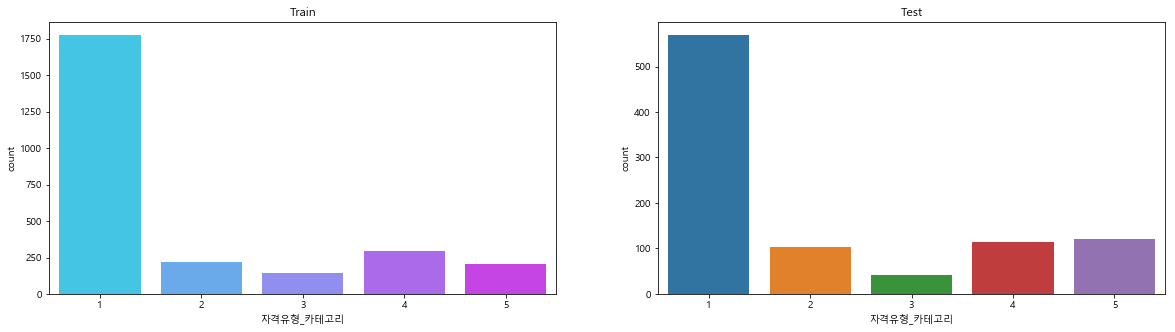

In [54]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(ncols=2)
sns.countplot(x=train.자격유형_카테고리,palette="cool",ax=ax[0]).set_title("Train")
sns.countplot(x=test.자격유형_카테고리,ax=ax[1]).set_title("Test")

### 임대건물구분
▶상가만 있는 단지는 X

▶<font color="red">상가비율 column 추가</font> <br>

#### 상가비율
상가비율에 따라 상업용/주거용 단지 구분 가능
- train set

In [55]:
train_cls = pd.concat([train[['단지코드']], pd.get_dummies(train[['임대건물구분']])], axis=1).groupby('단지코드').sum()
train_cls.loc[train_cls.임대건물구분_아파트==0,]
# 아파트가 없는 단지는 없다.

,임대건물구분_상가,임대건물구분_아파트
단지코드,,


In [56]:
tot = train_cls['임대건물구분_상가']+train_cls['임대건물구분_아파트']
train_cls['상가비율'] = train_cls['임대건물구분_상가']/tot
train_cls.head()

,임대건물구분_상가,임대건물구분_아파트,상가비율
단지코드,,,
C1000,0,7,0.0000
C1004,13,2,0.8667
C1005,0,3,0.0000
C1013,0,5,0.0000
C1014,0,7,0.0000


In [57]:
train = pd.merge(train,train_cls[['상가비율']].reset_index(),on='단지코드')
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수,자격유형_카테고리,상가비율
0,C2483,900,아파트,경상북도,국민임대/장기전세,39.7200,134,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,0.0000
1,C2483,900,아파트,경상북도,국민임대/장기전세,39.7200,15,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,0.0000
2,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,385,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,0.0000
3,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,15,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,0.0000
4,C2483,900,아파트,경상북도,국민임대/장기전세,51.9300,41,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,0.0000


- test set

In [58]:
test_cls = pd.concat([test[['단지코드']], pd.get_dummies(test[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = test_cls['임대건물구분_상가']+test_cls['임대건물구분_아파트']
test_cls['상가비율'] = test_cls['임대건물구분_상가']/tot
test = pd.merge(test,test_cls[['상가비율']].reset_index(),on='단지코드')

**numerical feature**
- 임대료 & 임대보증금
- 총세대수& 전용면적별세대수
- 공가수
- 지하철역 & 버스정류장
- 단지내주차면수
- 전용면적
- 등록차량수

### 임대료 & 임대보증금 
▶ train set에서 임대보증금만 NA인 건물은 9개 <br>
그 외에는 임대료 & 임대보증금 모두 NA

▶ test set에서 임대료가 NA인 건물은 임대보증금이 NA인 건물과 동일

▶ <font color="red">공공분양은 0으로 대체</font> 

▶ 지역별 가중치 <br>
ex: 강원도같은 경우는 평균치를 넣고 서울은 이것의 1.5배로 설정

In [59]:
check_NA(train)
check_NA(test)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


In [60]:
sum(test.loc[test.임대료.isna(),:].index!=test.loc[test.임대보증금.isna(),:].index)

0

#### NA imputation
▶ 공공분양은 0으로 대체

In [61]:
train.loc[(train.임대료.isna())&(train.공급유형=="공공분양"),'임대료'] = 0
train.loc[(train.임대보증금.isna())&(train.공급유형=="공공분양"),'임대보증금'] = 0

▶ 동일한 단지코드인 아파트 임대료, 임대보증금 평균 값을 사용해서 NA imputation

cf.) 다른 외부 데이터를 이용해서 주상복합에 속한 아파트, 상가의 보증금 관계를 살펴보는 것도 하나의 방법

- train set

**Step 1. 단지코드별 평균으로 대체<font>**

In [62]:
check_NA(train)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


In [63]:
def get_values(data, code, col):
    df = data[(data['단지코드']==code)&(data[col].isna()==False)]
    return df[col].values.mean()

In [64]:
def impute_by_code(data, col):
    code = data[data[col].isna()==True]['단지코드'].unique()
    print(f"{col}에 NA가 있는 단지코드: {code}")
    print(f"{col}이(가) 모두 NA인 단지코드:")
    for i in code:
        n = data[(data['단지코드']==i)&(data[col].isna()==False)].shape[0]
        ind = data[(data['단지코드']==i)&(data[col].isna()==True)].index
        if n==0 :
            print(i)
        if n != 0 :
            data.loc[ind,col] = get_values(data, i, col)
    return data

In [65]:
# 임대료 NA impute
train = impute_by_code(train, '임대료')

임대료에 NA가 있는 단지코드: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571' 'C1397' 'C1039' 'C1350'
 'C1326' 'C1786' 'C2186']
임대료이(가) 모두 NA인 단지코드:
C1397
C1326


In [66]:
# 임대보증금 NA impute
train = impute_by_code(train, '임대보증금')

임대보증금에 NA가 있는 단지코드: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571' 'C1350' 'C1326' 'C1786'
 'C2186']
임대보증금이(가) 모두 NA인 단지코드:
C1326


In [67]:
check_NA(train)

NA check
임대보증금 5 -> 0.19 %
임대료 11 -> 0.418 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


**Step2. 모두 NA인 경우 해당 단지코드의 지역과 공급유형이 동일한 단지코드의 평균으로 대체**

In [68]:
train[train['단지코드']=='C1326'][['지역','공급유형']].values[0]

array(['부산광역시', '국민임대/장기전세'], dtype=object)

In [69]:
train[train['단지코드']=='C1397'][['지역','공급유형']].values[0]

array(['서울특별시', '국민임대/장기전세'], dtype=object)

In [70]:
# C1326
m = train[(train['지역']=='서울특별시')&(train['공급유형']=='국민임대/장기전세')&(train['임대료'].isna()==False)]['임대료'].values.mean()
train.loc[train['단지코드']=='C1397','임대료'] = m
# C1397
m1 = train[(train['지역']=='부산광역시')&(train['공급유형']=='국민임대/장기전세')&(train['임대료'].isna()==False)]['임대료'].values.mean()
m2 = train[(train['지역']=='부산광역시')&(train['공급유형']=='국민임대/장기전세')&(train['임대보증금'].isna()==False)]['임대보증금'].values.mean()
train.loc[train['단지코드']=='C1326','임대료'] = m1
train.loc[train['단지코드']=='C1326','임대보증금'] = m2

In [71]:
check_NA(train)

NA check
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


- test set

In [72]:
check_NA(test)

NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


In [73]:
# 임대료 NA impute
test = impute_by_code(test, '임대료')

임대료에 NA가 있는 단지코드: ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729' 'C2152' 'C1267']
임대료이(가) 모두 NA인 단지코드:
C2152


In [74]:
# 임대보증금 NA impute
test = impute_by_code(test, '임대보증금')

임대보증금에 NA가 있는 단지코드: ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729' 'C2152' 'C1267']
임대보증금이(가) 모두 NA인 단지코드:
C2152


In [75]:
test[test['단지코드']=='C2152'][['지역','공급유형']].values[0]

array(['강원도', '영구임대'], dtype=object)

In [76]:
# C2152
m = test[(test['지역']=='강원도')&(test['공급유형']=='영구임대')&(test['임대료'].isna()==False)]['임대료'].values.mean()
test.loc[test['단지코드']=='C2152','임대료'] = m
test.loc[test['단지코드']=='C2152','임대보증금'] = m

In [77]:
check_NA(test)

NA check
지하철역 34 -> 3.583 %


## 총세대수 & 전용면적별세대수
- 전용면적별세대수 = '임대'아파트 
- 총세대수 = '임대'아파트 + '분양'아파트

▶임대아파트가 분양되거나 단지 내 상가가 분양된 경우 전용면적별세대수의 합과 총세대수가 분양된 수만큼 차이가 남

▶분양세대수 column 추가? - X

### 단지내주차면수
target과의 correlation이 높은 변수

In [78]:
train.corr()["등록차량수"].abs().sort_values(ascending=False)

등록차량수      1.0000
단지내주차면수    0.8513
임대료        0.4628
총세대수       0.4237
상가비율       0.4031
임대보증금      0.3821
전용면적별세대수   0.1889
버스정류장      0.1193
공가수        0.0955
전용면적       0.0811
지하철역       0.0778
Name: 등록차량수, dtype: float64

# 주차면수 대체변수: 1세대당 가능 주차면수(NEW)

- 임대주택 만들 때 세대수를 정하고서 주차면수가 정해지는 것이라고 합니다. 
- 그래서 1세대당 주차면수가 얼마나 가능한지를 나타낼 수 있는 주차면수/총세대수가 더 의미있을 것 같음.  

In [79]:
train['세대당 가능주차면수'] = train['단지내주차면수']/train['총세대수']
test['세대당 가능주차면수'] = test['단지내주차면수']/test['총세대수']

In [80]:
train.drop(['단지코드'],1,).corr()["등록차량수"].abs().sort_values(ascending=False)

등록차량수        1.0000
단지내주차면수      0.8513
세대당 가능주차면수   0.5131
임대료          0.4628
총세대수         0.4237
상가비율         0.4031
임대보증금        0.3821
전용면적별세대수     0.1889
버스정류장        0.1193
공가수          0.0955
전용면적         0.0811
지하철역         0.0778
Name: 등록차량수, dtype: float64

In [81]:
test.drop(['단지코드'],1,).corr()["단지내주차면수"].abs().sort_values(ascending=False)

단지내주차면수      1.0000
총세대수         0.4745
세대당 가능주차면수   0.4146
임대료          0.4004
상가비율         0.3467
임대보증금        0.3350
전용면적별세대수     0.3124
공가수          0.2896
버스정류장        0.1595
지하철역         0.0705
전용면적         0.0371
Name: 단지내주차면수, dtype: float64

# 분양비율(NEW)

- (총세대수-공가수)/총세대수

In [82]:
train['분양비율']= (train.총세대수-train.공가수)/train.총세대수 

In [83]:
test['분양비율']= (test.총세대수-test.공가수)/test.총세대수 

In [84]:
train.drop(['단지코드'],1,).corr()["등록차량수"].abs().sort_values(ascending=False)

등록차량수        1.0000
단지내주차면수      0.8513
세대당 가능주차면수   0.5131
임대료          0.4628
총세대수         0.4237
상가비율         0.4031
임대보증금        0.3821
분양비율         0.2493
전용면적별세대수     0.1889
버스정류장        0.1193
공가수          0.0955
전용면적         0.0811
지하철역         0.0778
Name: 등록차량수, dtype: float64

In [85]:
train.drop(['단지코드'],1,).corr()["총세대수"].abs().sort_values(ascending=False)

총세대수         1.0000
단지내주차면수      0.5983
등록차량수        0.4237
분양비율         0.4233
상가비율         0.3732
세대당 가능주차면수   0.2323
전용면적별세대수     0.1682
지하철역         0.1365
공가수          0.1032
전용면적         0.0675
버스정류장        0.0373
임대보증금        0.0252
임대료          0.0005
Name: 총세대수, dtype: float64

### 전용면적
주택법상 주택건설기준에 따라 전용면적 85㎡ 이하 1가구당 주차장 1면을 설치해야 함 <br>
대형 면적인 85㎡ 초과 세대의 경우 전용면적 기준은 70㎡당 1면

▶<font color="red">대형전용면적 column 추가</font> <br>

▶<font color="red">전용면적_카테고리 column 추가</font> 

#### 대형전용면적
85㎡를 초과하는 건물은 대형건물로 분류

- train set

In [86]:
level = 85
train['대형전용면적'] = 0
train.loc[train.전용면적>level, '대형전용면적'] = 1
train.loc[train.전용면적<=level, '대형전용면적'] = 0

- test set

In [87]:
level = 85
test['대형전용면적'] = 0
test.loc[test.전용면적>level, '대형전용면적'] = 1
test.loc[test.전용면적<=level, '대형전용면적'] = 0

#### 전용면적_카테고리
100㎡를 초과하는 건물은 outlier로 간주 & 10㎡ 단위로 범주화
- train set

In [88]:
def category(x):
    for ind,i in enumerate(list(range(10,110,5))): #0부터 100까지 10단위
        if int(x) in range(i-10,i): return ind
    for ind,i in enumerate(list(range(100,600,100))):#100부터 600까지 100단위
        if int(x) in range(i,i+100): return 10+ind

In [89]:
train['전용면적_카테고리'] = train['전용면적'].apply(lambda x : category(x))

In [90]:
train['전용면적_카테고리']=train.전용면적_카테고리.astype(object)

- test set

In [91]:
test['전용면적_카테고리'] = test['전용면적'].apply(lambda x : category(x))

In [92]:
test['전용면적_카테고리']=test.전용면적_카테고리.astype(object)

### 지하철역 & 버스정류장
▶ <font color="red">그냥 0으로 대체?</font>

▶ 충청남도, 경상남도는 모두 0으로 채우고 대전은 생각해볼 것

In [93]:
check_NA(train)
check_NA(test)

NA check
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
지하철역 34 -> 3.583 %


In [94]:
print(train.loc[train.지하철역.isna(),'지역'].value_counts())

충청남도     82
대전광역시    69
경상남도      4
Name: 지역, dtype: int64


In [95]:
print(train.loc[train.버스정류장.isna(),'지역'].value_counts())

경상남도    4
Name: 지역, dtype: int64


#### NA imputation
**우선 0으로 대체**

In [96]:
cols = ['지하철역','버스정류장']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

In [97]:
check_NA(train)
check_NA(test)

NA check
...There's no NA
NA check
...There's no NA


# Preprocess

## 외부데이터 추가
### 지역별 남녀 인구수 & 승용차수
▶ train & test에는 인천광역시 X

In [98]:
car = pd.read_csv('인구수_자동차수.csv')
car.head()

,지역,남자인구수,여자인구수,승용차수
0,서울특별시,4654720,4920635,2711984
1,부산광역시,1648965,1718369,1189345
2,대구광역시,1184977,1217963,1027075
3,인천광역시,1470528,1465854,1426203
4,광주광역시,714101,729053,576366


In [99]:
car = car.loc[car.지역!="인천광역시"]
car.head()

,지역,남자인구수,여자인구수,승용차수
0,서울특별시,4654720,4920635,2711984
1,부산광역시,1648965,1718369,1189345
2,대구광역시,1184977,1217963,1027075
4,광주광역시,714101,729053,576366
5,대전광역시,727279,729882,576906


In [100]:
남자총인구=car.남자인구수.sum()
여자총인구=car.여자인구수.sum()

In [101]:
car.남자인구수=car.남자인구수/남자총인구
car.여자인구수=car.여자인구수/여자총인구

## 데이터 병합

In [102]:
train.shape, test.shape

((2632, 21), (949, 20))

In [103]:
train = pd.merge(train, age_gender, on='지역', how='outer')
train = pd.merge(train, car, on='지역', how='outer')

test = pd.merge(test, age_gender.loc[age_gender.지역!="서울특별시",:], on='지역', how='outer')
test = pd.merge(test, car.loc[car.지역!="서울특별시",:], on='지역', how='outer')

In [104]:
train.shape, test.shape

((2632, 46), (949, 45))

In [105]:
check_NA(train)
check_NA(test)

NA check
...There's no NA
NA check
...There's no NA


## 추가) 단지내주차면수를 기준으로 데이터를 분할

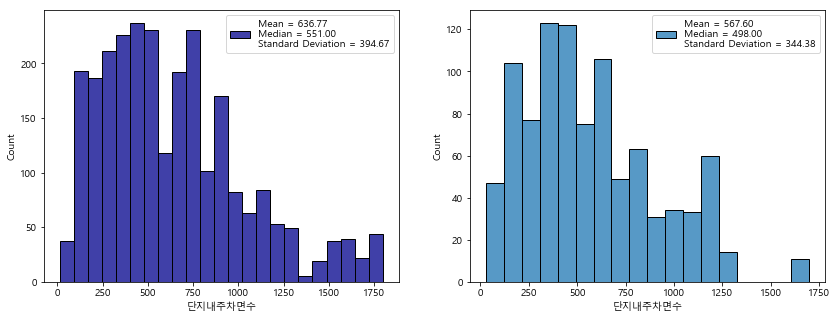

In [106]:
plt.rcParams["figure.figsize"] = (14,5)
fig, ax = plt.subplots(ncols=2)
label_=f"Mean = {train['단지내주차면수'].mean():.2f}\nMedian = {train['단지내주차면수'].median():.2f}\nStandard Deviation = {train['단지내주차면수'].std():.2f}"
sns.histplot(x=train["단지내주차면수"],color="darkblue", label=label_, ax=ax[0]).legend(loc='best',fontsize=10)

label_=f"Mean = {test['단지내주차면수'].mean():.2f}\nMedian = {test['단지내주차면수'].median():.2f}\nStandard Deviation = {test['단지내주차면수'].std():.2f}"
sns.histplot(x=test["단지내주차면수"], label=label_, ax=ax[1]).legend(loc='best',fontsize=10)
plt.show()

In [107]:
pd.DataFrame(train["단지내주차면수"].unique()).describe()

,0
count,355.0000
mean,617.9465
std,378.8537
min,13.0000
25%,331.5000
50%,548.0000
75%,849.0000
max,"1,798.0000"


In [108]:
pd.DataFrame(test["단지내주차면수"].unique()).describe()

,0
count,143.0000
mean,562.8112
std,321.3673
min,29.0000
25%,318.0000
50%,516.0000
75%,743.5000
max,"1,696.0000"


In [109]:
q1=train['단지내주차면수'].quantile(q=0.25, interpolation='nearest')
q3=train['단지내주차면수'].quantile(q=0.75, interpolation='nearest')

In [110]:
train['class_']=0
test['class_']=0

In [111]:
train['class_'].loc[train['단지내주차면수'] <q1]=1
train['class_'].loc[(train['단지내주차면수']>=q1) & (train['단지내주차면수']<q3)]=2 
train['class_'].loc[train['단지내주차면수']>=q3]=3

In [112]:
test['class_'].loc[test['단지내주차면수'] <q1]=1
test['class_'].loc[(test['단지내주차면수']>=q1) & (test['단지내주차면수']<q3)]=2 
test['class_'].loc[test['단지내주차면수']>=q3]=3

In [113]:
train_low=train[train.class_==1]
train_med=train[train.class_==2]
train_high=train[train.class_==3]

In [114]:
test_low=test[test.class_==1]
test_med=test[test.class_==2]
test_high=test[test.class_==3]

In [115]:
train.class_=train.class_.astype(object)
test.class_=test.class_.astype(object)

In [116]:
X_cor = train.drop(columns=['자격유형', 'class_', '전용면적'])

In [117]:
X_cor = pd.get_dummies(X_cor, drop_first=True)

In [118]:
corr = X_cor.corr()["등록차량수"].abs().sort_values(ascending=False)

In [119]:
corr.head(20)

등록차량수                     1.0000
단지내주차면수                   0.8513
세대당 가능주차면수                0.5131
임대료                       0.4628
공급유형_공공임대(5년/10년/분납/분양)   0.4258
총세대수                      0.4237
상가비율                      0.4031
임대보증금                     0.3821
공급유형_임대상가                 0.3506
임대건물구분_아파트                0.3506
30대(남자)                   0.3366
30대(여자)                   0.3340
단지코드_C1363                0.3303
자격유형_카테고리_4               0.3132
50대(남자)                   0.2860
단지코드_C1350                0.2798
40대(남자)                   0.2670
분양비율                      0.2493
지역_경기도                    0.2439
여자인구수                     0.2414
Name: 등록차량수, dtype: float64

이 밑은 모델링

## Train Test split

In [120]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [121]:
X = train.drop(columns=['등록차량수','class_','자격유형', '전용면적'])
y = train[['등록차량수']]

In [122]:
X = pd.get_dummies(X, drop_first=True)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2021)

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor(random_state=2021).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mean_absolute_error(y_test, rf_pred)

19.185848101265822

In [126]:
from sklearn.tree import DecisionTreeRegressor 

In [127]:
dc = DecisionTreeRegressor(random_state=2021).fit(X_train, y_train)
dc_pred = dc.predict(X_test)
mean_absolute_error(y_test, dc_pred)

15.074683544303797

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
gb =  GradientBoostingRegressor(random_state=2021).fit(X_train, y_train)
gb_pred = gb.predict(X_test)
mean_absolute_error(y_test, gb_pred)

82.90365194285515

In [130]:
from xgboost import XGBRegressor

In [131]:
xgb =  XGBRegressor(random_state=2021).fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
mean_absolute_error(y_test, xgb_pred)

26.003701685651947

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lr= LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_absolute_error(y_test, lr_pred)

2.7256107248854295

롸...?

In [134]:
importance = lr.coef_ # get importance

In [135]:
importance= pd.DataFrame(importance)

In [136]:
Xc=pd.DataFrame(X_train.columns)

In [137]:
importance=importance.transpose()

In [138]:
lr_feature= pd.concat([importance, Xc], axis=1)

In [139]:
lr_feature.columns=['importance', '변수']

In [140]:
lr_feature=lr_feature.sort_values("importance", ascending=True)

In [141]:
lr_feature.tail(15)

,importance,변수
151,322.5438,단지코드_C1527
57,333.2258,단지코드_C1065
67,335.3853,단지코드_C1122
93,352.4799,단지코드_C1244
431,363.6134,단지코드_C2583
48,377.2831,단지코드_C1036
187,400.2909,단지코드_C1693
376,411.2978,단지코드_C2405
341,411.9712,단지코드_C2276
276,426.0174,단지코드_C2032


단지코드에 의존도가 심한 듯하다...

In [142]:
from sklearn.linear_model import Ridge

In [143]:
ri = Ridge().fit(X_train, y_train)
ri_pred = ri.predict(X_test)
mean_absolute_error(y_test, ri_pred)

28.652421352219193

In [144]:
from sklearn.linear_model import Lasso

In [145]:
la = Lasso().fit(X_train, y_train)
la_pred = la.predict(X_test)
mean_absolute_error(y_test, la_pred)

115.16918140815083

# 분포별 나눠서 test

In [146]:
X_low = train_low.drop(columns=['등록차량수', "class_", "자격유형","전용면적"])
y_low = train_low[['등록차량수']]
X_med = train_med.drop(columns=['등록차량수', "class_", "자격유형", "전용면적"])
y_med = train_med[['등록차량수']]
X_high = train_high.drop(columns=['등록차량수', "class_", "자격유형","전용면적"])
y_high = train_high[['등록차량수']]

In [147]:
X_low = pd.get_dummies(X_low, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, shuffle=True, random_state=2021)

In [148]:
rf = RandomForestRegressor(random_state=2021).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mean_absolute_error(y_test, rf_pred)

9.645252525252527

In [149]:
dc = DecisionTreeRegressor(random_state=2021).fit(X_train, y_train)
dc_pred = dc.predict(X_test)
mean_absolute_error(y_test, dc_pred)

5.348484848484849

In [150]:
lr= LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_absolute_error(y_test, lr_pred)

3.3233623422151406

In [151]:
X_med = pd.get_dummies(X_med, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_med, y_med, test_size=0.3, shuffle=True, random_state=2021)

In [152]:
rf = RandomForestRegressor(random_state=2021).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mean_absolute_error(y_test, rf_pred)

17.5734096692112

In [153]:
dc = DecisionTreeRegressor(random_state=2021).fit(X_train, y_train)
dc_pred = dc.predict(X_test)
mean_absolute_error(y_test, dc_pred)

5.569974554707379

In [154]:
lr= LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_absolute_error(y_test, lr_pred)

0.8691788708186015

In [155]:
X_high = pd.get_dummies(X_high, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, shuffle=True, random_state=2021)

In [156]:
rf = RandomForestRegressor(random_state=2021).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mean_absolute_error(y_test, rf_pred)

19.820398009950242

In [157]:
dc = DecisionTreeRegressor(random_state=2021).fit(X_train, y_train)
dc_pred = dc.predict(X_test)
mean_absolute_error(y_test, dc_pred)

5.557213930348259

In [158]:
lr= LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_absolute_error(y_test, lr_pred)

1.423348009822701

# 하나로 예측

In [159]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


In [160]:
df= pd.concat([train, test])

In [161]:
train.shape, test.shape

((2632, 47), (949, 46))

In [162]:
X = df.drop(columns=['등록차량수',"자격유형","전용면적","class_"])
X= pd.get_dummies(X, drop_first=True)

In [163]:
X.train=X.iloc[0:2632, :]
X.test=X.iloc[2632:, :]
y_train = train[['등록차량수']]

- rf = RandomForestRegressor(random_state=2021).fit(X.train, y_train)
- rf_pred = rf.predict(X.test)

In [164]:
rf = LinearRegression(random_state=2021).fit(X.train, y_train)
rf_pred = rf.predict(X.test)

In [165]:
rf_0=pd.DataFrame(rf_pred)

In [166]:
code0=test.단지코드

In [167]:
pred_=pd.concat([code0, rf_0], axis=1, ignore_index=True)

In [168]:
pred_.columns=["code", "num"]

In [169]:
pred_=pred_.num.groupby(pred_.code).mean()

In [170]:
pred_.head()

code
C1003   269.6787
C1006   274.5579
C1016   740.2825
C1019   314.7350
C1030    22.9500
Name: num, dtype: float64

In [171]:
pred_=pd.merge(sample, pred_, on='code', how='outer')

In [172]:
pred_= pred_.drop(columns='num_x')

In [173]:
pred_.columns=["code","num"]

In [174]:
pred_

,code,num
0,C1072,694.9362
1,C1128,959.5278
2,C1456,522.2938
3,C1840,467.3400
4,C1332,"1,004.5587"
...,...,...
145,C2456,327.4900
146,C1266,530.4220
147,C2152,46.7500
148,C1267,461.2282


In [176]:
pred_.to_csv('0701_2.csv', index=False)

# 나눠서 예측

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

In [133]:
df1= pd.concat([train_low, test_low])
df2= pd.concat([train_med, test_med])
df3= pd.concat([train_high, test_high])

In [134]:
train_low.shape, train_med.shape, train_high.shape 

((658, 46), (1307, 46), (667, 46))

In [135]:
X = df1.drop(columns=['등록차량수',"자격유형","전용면적","class_"])
X= pd.get_dummies(X, drop_first=True)

In [136]:
X.train=X.iloc[0:658, :]
X.test=X.iloc[658:, :]
y_train = train_low[['등록차량수']]

In [137]:
rf = RandomForestRegressor(random_state=2021).fit(X.train, y_train)
rf_pred1 = rf.predict(X.test)

In [138]:
rf_1=pd.DataFrame(rf_pred1)

In [139]:
code1=df1.iloc[658:, :].단지코드
code1=pd.DataFrame(code1)
code1=code1.reset_index()

In [140]:
code1=code1['단지코드']

In [141]:
pred1=pd.concat([code1, rf_1], axis=1, ignore_index=True)

In [143]:
X = df2.drop(columns=['등록차량수',"자격유형","전용면적","class_"])
X= pd.get_dummies(X, drop_first=True)

In [144]:
X.train=X.iloc[0:1307, :]
X.test=X.iloc[1307:, :]
y_train = train_med[['등록차량수']]

In [145]:
rf = RandomForestRegressor(random_state=2021).fit(X.train, y_train)
rf_pred2 = rf.predict(X.test)

In [148]:
rf_2=pd.DataFrame(rf_pred2)

In [146]:
code2=df2.iloc[1307:, :].단지코드
code2=pd.DataFrame(code2)
code2=code2.reset_index()

In [147]:
code2=code2['단지코드']

In [149]:
pred2=pd.concat([code2, rf_2], axis=1, ignore_index=True)

In [151]:
X = df3.drop(columns=['등록차량수',"자격유형","전용면적","class_"])
X= pd.get_dummies(X, drop_first=True)

In [152]:
X.train=X.iloc[0:667, :]
X.test=X.iloc[667:, :]
y_train = train_high[['등록차량수']]

In [153]:
rf = RandomForestRegressor(random_state=2021).fit(X.train, y_train)
rf_pred3 = rf.predict(X.test)

In [154]:
rf_3=pd.DataFrame(rf_pred3)

In [155]:
code3=df3.iloc[667:, :].단지코드
code3=pd.DataFrame(code3)
code3=code3.reset_index()

In [156]:
code3=code3['단지코드']

In [157]:
pred3=pd.concat([code3, rf_3], axis=1, ignore_index=True)

In [158]:
df_merge=pd.concat([pred1, pred2, pred3], axis=0, ignore_index=True)

In [159]:
df_merge.columns=["code", "num"]

In [160]:
pred_split=df_merge.num.groupby(df_merge.code).mean()

In [161]:
test_split=pd.merge(sample, pred_split, on='code', how='outer')

In [162]:
test_split.head()

,code,num_x,num_y
0,C1072,0,675.2862
1,C1128,0,963.6578
2,C1456,0,534.7325
3,C1840,0,480.7425
4,C1332,0,"1,053.1025"


In [164]:
test_split= test_split.drop(columns='num_x')

In [165]:
test_split.columns=["code","num"]

In [167]:
test_split.to_csv('0630_2.csv', index=False)